# Goodness-of-Fit Test


One of the traditional statistical approaches, the Goodness-of-Fit test gives a solution to validate our theoretical assumptions about data distributions. 
This notebook discusses the Goodness-of-Fit test with some common data distributions using Python code.

Please refer [this](https://analyticsindiamag.com/goodness-of-fit-python-guide/) article.

# Code Implementation





Import necessary libraries and modules to create the Python environment.

In [ ]:
!python -m pip install pip --upgrade --user -q
!python -m pip install numpy pandas seaborn matplotlib scipy statsmodels --user -q

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

In [ ]:
# create the environment

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

## Uniform Distribution

Let us assume we have dice in our hand. A dice has six faces and six distinct possible outcomes ranging from 1 to 6 if we toss it once. An unbiased dice has equal probabilities for all possible outcomes. To check whether the dice in our hand is unbiased, we toss them 90 times (more trials ensure that the outcomes are statistically significant) and note down the counts of outcomes.

In [ ]:
path = 'https://raw.githubusercontent.com/RajkumarGalaxy/dataset/master/Tabular/uniform_dice.csv'
dice = pd.read_csv(path)
dice

Since each face of the dice is assumed to have equal probabilities, the outcomes must be uniformly distributed. Hence we can express the null hypothesis at 5% level of significance as follows:

    The dice is unbiased and its outcomes follow uniform distribution

Following an ideal uniform distribution, expected frequencies can be derived by giving equal weightage to each outcome.

In [ ]:
# Total frequency
total_freq = dice['observed'].sum()
print('Total Frequency : ', total_freq)

# Expected frequency
expected_freq = total_freq / 6
print('Expected Frequency : ', expected_freq)

In [ ]:
dice['expected'] = expected_freq
dice

Let us visualize the data distribution.

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (6,6))

# plot observed frequency
plt.subplot(211)
plt.bar(dice['face'], dice['observed'])
plt.ylabel('Observed Frequency')
plt.ylim([0,20])

# plot expected frequency
plt.subplot(212)
plt.bar(dice['face'], dice['expected'])
plt.ylabel('Expected Frequency')
plt.xlabel('Face of dice')
plt.ylim([0,20])
plt.show()

It is the right time for us to discuss how the Goodness-of-Fit test works. Under ideal conditions, the outcomes’ frequency should be identical to the expected frequency. But, the observed frequency differs a little from the expected frequency. Goodness-of-Fit test evaluates whether this variation is significantly acceptable. In other words, it tests how far the observed data fits to the expected distribution.

This closeness in fit (goodness-of-fit) is calculated with a parameter called Chi-Square. Mathematically, it is expressed as:

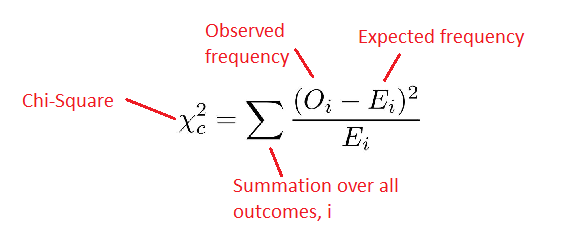

If there is more deviation between the observed and expected frequencies, the value of Chi-Square will be more. If the observed frequencies match the expected frequencies exactly, its value will be zero. therefore, a value close to zero denotes more closeness in the fit.

We can define a helper function to calculate the Chi-Square value.

In [ ]:
# a helper function to calculate the Chi-Square value

def Chi_Square(obs_freq, exp_freq):
  count = len(obs_freq)
  chi_sq = 0

  for i in range(count):
    x = (obs_freq[i] - exp_freq[i]) ** 2
    x = x / exp_freq[i]
    chi_sq += x

  return chi_sq


The Chi-Square value for our example is calculated as follows.

In [ ]:
# calculate using the helper function
Chi_Square(dice['observed'], dice['expected'])

It should be noted that SciPy’s `stats` module can calculate the same as below.

In [ ]:
# calculate using the stats module of SciPy library
stats.chisquare(dice['observed'], dice['expected'])

To conclude the null hypothesis, we have to compare the calculated Chi-Square value with the critical Chi-Square value. The critical Chi-Square value can be calculated using SciPy’s stats module. It takes as arguments (1 – level-of-significance, degrees of freedom). Degrees of freedom for Chi-Square is calculated as:

DOF = Number of outcomes - p - 1

In [ ]:
# critical Chi-Square - percent point function
DOF = len(dice['observed']) - 0 - 1
stats.chi2.ppf(0.95, DOF)

If the calculated Chi-Square value is more than or equal to the critical value, the null hypothesis should be rejected. On the other hand, if the calculated Chi-Square value is less than the critical value, the null hypothesis should not be rejected.

Here, for our problem, the calculated value of 2.8 is much lesser than the critical value of 11.07. Hence, we cannot reject the null hypothesis, i.e., the observed distribution significantly follows a uniform distribution.

We can say that the data follows uniform distribution.

## Normal Distribution

A bulb manufacturer wants to know whether the life of the bulbs follows the normal distribution. Forty bulbs are randomly sampled, and their life, in months, are observed.

In [ ]:
path = 'https://raw.githubusercontent.com/RajkumarGalaxy/dataset/master/Tabular/bulb_life.csv'
data = pd.read_csv(path)
data.head(10)

We can visualize the data using Seaborn’s `histplot` method.

In [ ]:
sns.histplot(data=data, x='life', bins=8)
plt.show()

The data cannot be assured, with bare eyes, to be normally distributed. We know that a random variable that follows normal distribution is continuous. Hence, we can easily define bin intervals such that each bin should have at least five as its expected frequency. Here, in our problem there are 40 sample bulbs. To have five expected samples in each bin, we should have exactly 40/5 = 8 bins in total.

Find the bin interval to have five expected frequencies per bin.

In [ ]:
# mean and standard deviation of given data
mean = np.mean(data['life'])
std = np.std(data['life'])

bins = 8
interval = []
for i in range(1,9):
  val = stats.norm.ppf(i/bins, mean, std)
  interval.append(val)
interval

The distribution ranges from negative infinity to positive infinity. Include negative infinity in the above list.

In [ ]:
interval.insert(0, -np.inf)
interval

To calculate the observed frequency, we can just count the number of outcomes in these intervals. First, create a data frame with 8 intervals as below.

In [ ]:
df = pd.DataFrame({'lower_limit':interval[:-1], 'upper_limit':interval[1:]})
df

Create two columns each for observed and expected frequency. Use Pandas’ apply method to calculate the observed frequency between intervals.

In [ ]:
life_values = list(sorted(data['life']))
df['obs_freq'] = df.apply(lambda x:sum([i>x['lower_limit'] and i<=x['upper_limit'] for i in life_values]), axis=1)
df['exp_freq'] = 5
df

We are now ready to perform the Goodness-of-Fit test. We can state our null hypothesis at a 5% level of significance as:

    The bulb life follows normal distribution.

Calculate the actual Chi-Square value using the chisquare method available in SciPy’s stats module.

In [ ]:
stats.chisquare(df['obs_freq'], df['exp_freq'])

Calculate the critical Chi-Square value using the chi2.ppf method available in SciPy’s stats module.

In [ ]:
p = 2    # number of parameters
DOF = len(df['obs_freq']) - p -1
stats.chi2.ppf(0.95, DOF)


It is observed that the calculated Chi-Square value is less than the critical value. Hence, the null hypothesis can not be rejected. In other words, the life of bulbs are normally distributed.
